<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-17804-1659676533/blob/main/ASSESSMENTS/AKSHAYA%20SELVI%20A/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2)Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

Load Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment 3/Animal_Dataset/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1238 images belonging to 4 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment 3/Animal_Dataset/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [10]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [11]:
x_test.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

3)Create Model

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [16]:
model=Sequential()

4)Add Layers

a)Convolution Layer

In [17]:
model.add(Convolution2D(32,(3,3),kernel_initializer="random_uniform",activation="relu",strides=(1,1),input_shape=(64,64,3)))

b)MaxPooling Layer

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

c)Flatten

In [20]:
model.add(Flatten())

d)Dense(Hidden layer)

In [21]:
model.add(Dense(300,activation="relu"))

In [22]:
model.add(Dense(300,activation="relu"))

e)Output layer

In [49]:
model.add(Dense(4,activation="softmax"))

5)Compile the model

In [50]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

6)Fit the model

In [51]:
model.fit(x_train,epochs=4,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/4
52/52 [==============================] - 276s 5s/step - loss: 1.3561 - accuracy: 0.3328 - val_loss: 1.3231 - val_accuracy: 0.3006
Epoch 2/4
52/52 [==============================] - 14s 276ms/step - loss: 1.2574 - accuracy: 0.3901 - val_loss: 1.1829 - val_accuracy: 0.4724
Epoch 3/4
52/52 [==============================] - 14s 277ms/step - loss: 1.2028 - accuracy: 0.4515 - val_loss: 1.1966 - val_accuracy: 0.5031
Epoch 4/4
52/52 [==============================] - 15s 281ms/step - loss: 1.1677 - accuracy: 0.4952 - val_loss: 1.1396 - val_accuracy: 0.4785


7)Save the model

In [53]:
model.save("Animals.h5")

8)Test the model

In [54]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [55]:
model=load_model("Animals.h5")

In [56]:
img=image.load_img(r"/content/drive/MyDrive/Assignment 3/Animal_Dataset/dataset/Training/elephants/elephant_653693__340.jpg",target_size=(64,64))

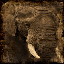

In [57]:
img

In [58]:
x=image.img_to_array(img)

In [59]:
x=np.expand_dims(x,axis=0)

In [60]:
pred=model.predict(x)

1/1 [==============================] - 0s 87ms/step


In [61]:
pred

array([[0.37020576, 0.08900713, 0.40694243, 0.13384469]], dtype=float32)

In [62]:
index=['bears','crows','elephants','rats']

In [63]:
index[np.argmax(pred)]

'elephants'